In [8]:
%pip install nltk
%pip install scikit-learn
%pip install wordcloud



import tokenize
import pandas as pd
import numpy as np

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

nltk.download('punkt')
nltk.download('stopwords')  
sns.set(style='whitegrid')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df = pd.read_csv(r"C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/data/desafio_indicium_imdb.csv")
df[['Series_Title', 'Overview', 'Genre', 'IMDB_Rating']].head()

,Series_Title,Overview,Genre,IMDB_Rating
0,The Godfather,An organized crime dynasty's aging patriarch t...,"Crime, Drama",9.2
1,The Dark Knight,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0
2,The Godfather: Part II,The early life and career of Vito Corleone in ...,"Crime, Drama",9.0
3,12 Angry Men,A jury holdout attempts to prevent a miscarria...,"Crime, Drama",9.0
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"Action, Adventure, Drama",8.9


In [ ]:
import string 

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Overview'] = df['Overview'].apply(clean_text)
df[['Overview', 'Cleaned_Overview']].head()


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk
nltk.download('punkt_tab')

df['Cleaned_Overview'] = df['Overview'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


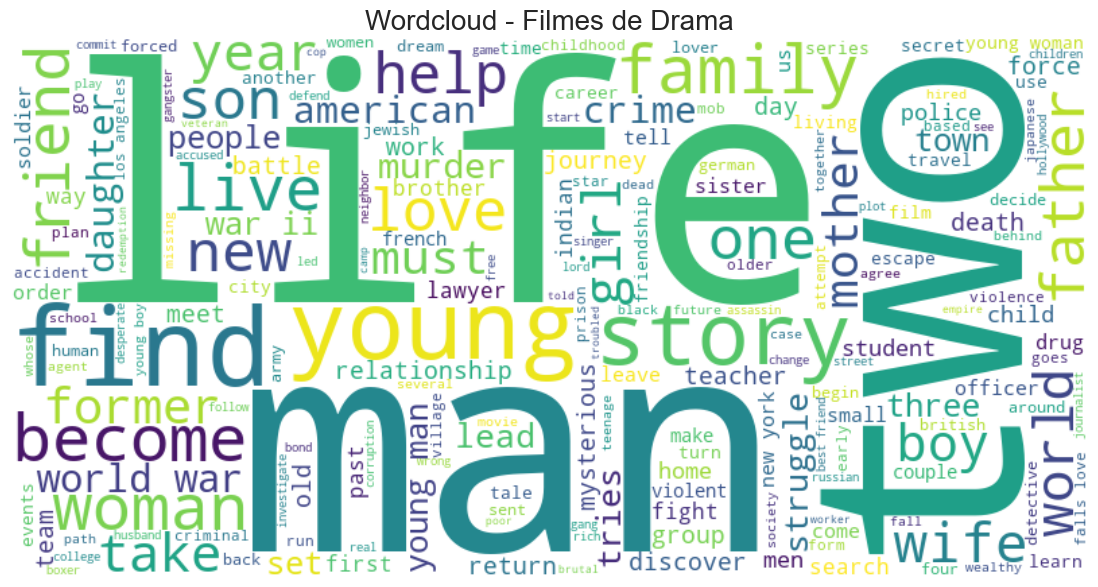

In [19]:
drama_text = ' '.join(df[df['Genre'].str.contains('Drama', na=False)]['Cleaned_Overview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(drama_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - Filmes de Drama', fontsize=20)    
plt.show()

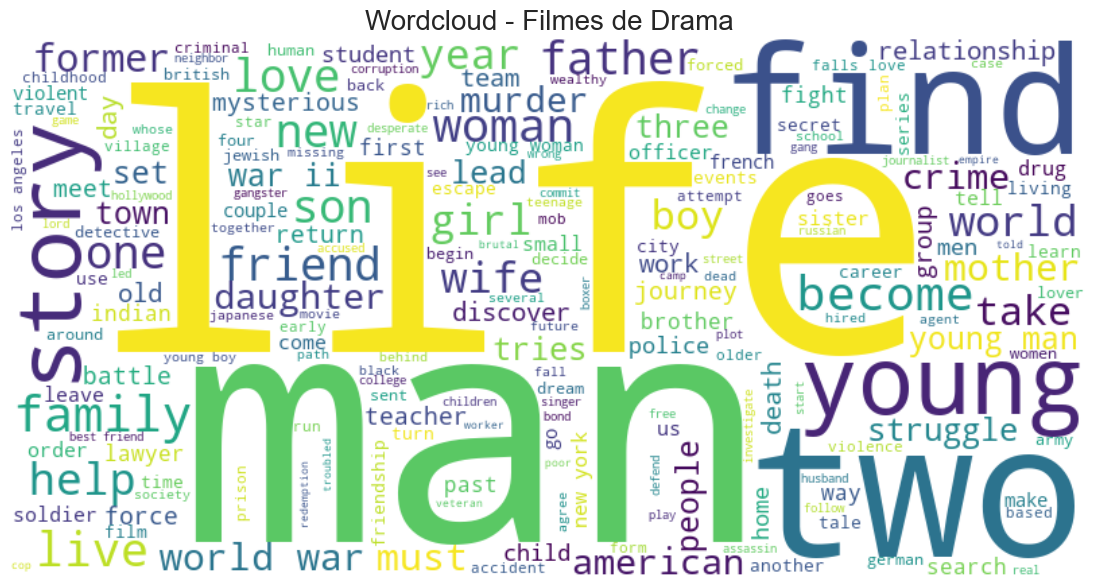

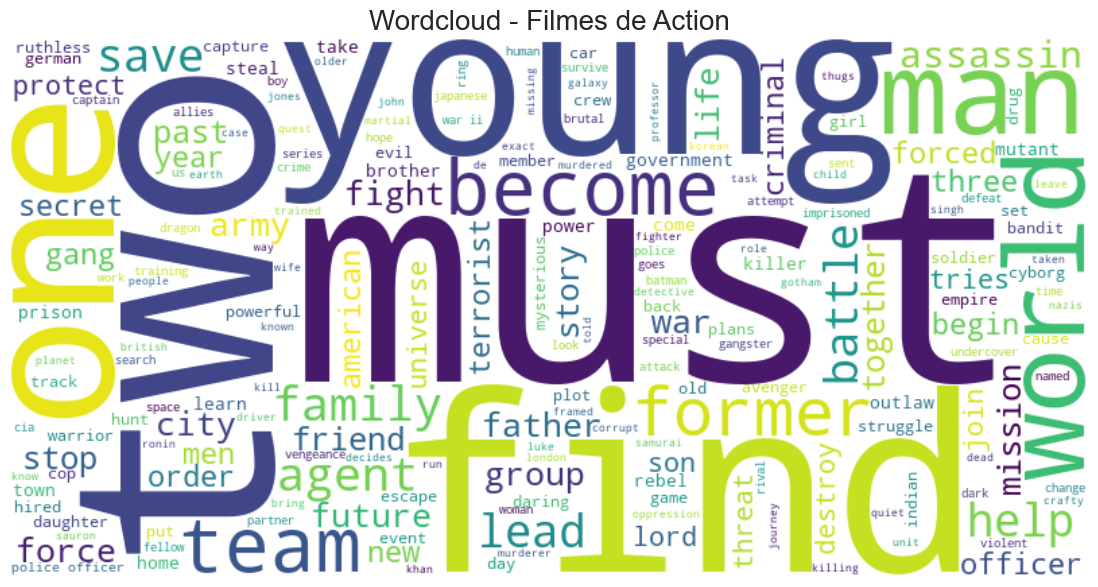

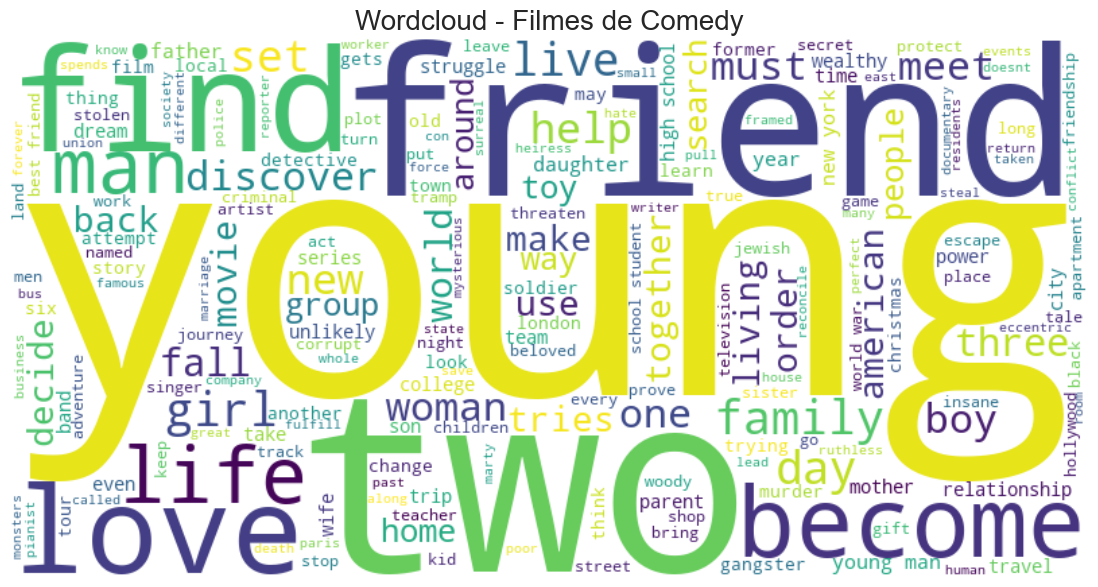

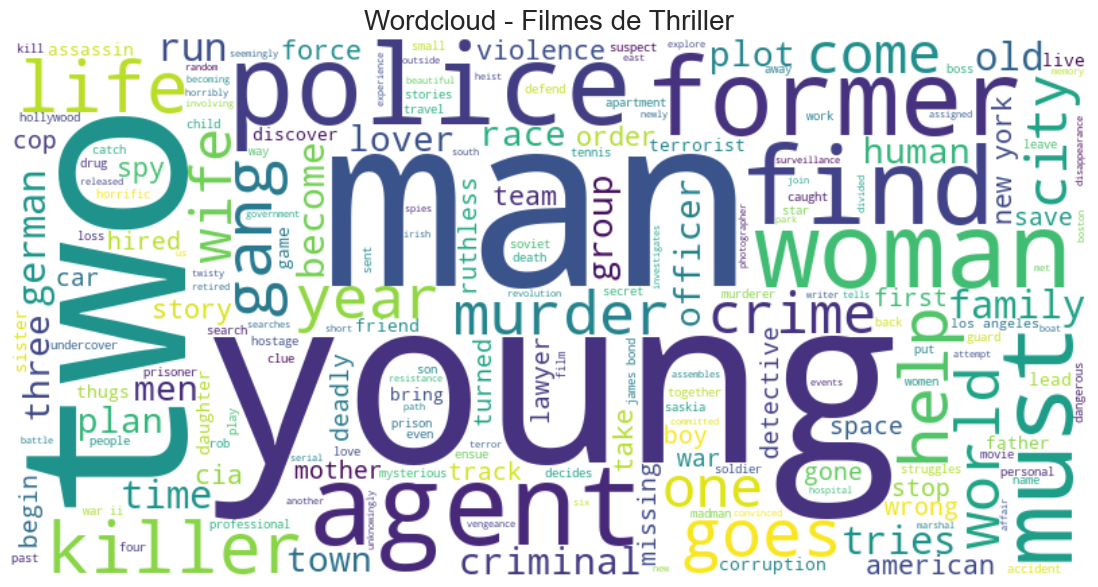

In [27]:
generos = ['Drama', 'Action', 'Comedy', 'Thriller']  # Você pode adicionar mais gêneros conforme necessário
for genero in generos:
    genero_text = ' '.join(df[df['Genre'].str.contains(genero, na=False)]['Cleaned_Overview'])
    if genero_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genero_text)
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Wordcloud - Filmes de {genero}', fontsize=20)
        plt.show()

In [20]:
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Overview'])

features = tfidf.get_feature_names_out()
mean_tfidf = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
top_indices = mean_tfidf.argsort()[::-1]

print("Top 10 palavras (TF-IDF):")
for i in top_indices[:10]:
    print(f"{features[i]}: {mean_tfidf[i]:.3f}")

Top 10 palavras (TF-IDF):
young: 0.065
life: 0.061
two: 0.060
man: 0.059
new: 0.040
story: 0.040
world: 0.040
family: 0.037
love: 0.035
woman: 0.035


In [22]:
df['is_drama'] = df['Genre'].str.contains('Drama', na=False).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['is_drama'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.09      0.16        43
           1       0.80      0.97      0.88       157

    accuracy                           0.79       200
   macro avg       0.65      0.53      0.52       200
weighted avg       0.73      0.79      0.72       200



In [26]:
df['Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)

word_presence = pd.DataFrame(tfidf_matrix.toarray(), columns=features)
word_presence['Rating'] = df['Rating'].values

correlations = word_presence.corr()['Rating'].sort_values(ascending=False)
print("Top palavras correlacionadas com nota:")
print(correlations.head(10))


Top palavras correlacionadas com nota:
Rating    1.000000
help      0.124537
crime     0.108971
son       0.072361
one       0.057895
police    0.051374
tries     0.050249
city      0.032886
girl      0.029612
war       0.028031
Name: Rating, dtype: float64
